In [8]:
pip install pyqtchart

  Using cached PyQtChart-5.15.6-cp37-abi3-win_amd64.whl (264 kB)
  Using cached PyQtChart_Qt5-5.15.2-py3-none-win_amd64.whl (680 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import mysql.connector
from matplotlib import pyplot as plt

from PySide2.QtCore import *
from PySide2.QtGui import *
from PySide2.QtWidgets import *

from PyQt5 import QtCore, QtGui, QtWidgets
from PySide2 import *
from PySide2.QtCharts import QtCharts
from PyQt5.QtChart import QChart, QBarSet, QBarSeries, QBarCategoryAxis

In [11]:
db = mysql.connector.connect(
    user = 'root',
    host = 'localhost',
    password ='root')

querry = 'SELECT * FROM mtracker.derrick;'

In [12]:
df = pd.read_sql(querry, db)
df.set_index('receipt', inplace = True)
df

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,trasaction_day,year,month,date,weekday,hour,minute,second,transaction_type,transaction_party,transaction_amount,paid_in_or_withdrawn,balance
receipt,,,,,,,,,,,,,
RDF1862UBT,101,2023,4,15,5,12,33,27,FULIZA TAKEN,FULIZA,20.0,PAID IN,0.0
RDF1862UBT,101,2023,4,15,5,12,33,27,PAY BILL,KPLC PREPAID,20.0,WITHDRAWN,-20.0
RDE66UNC64,100,2023,4,14,4,20,14,15,FULIZA TAKEN,FULIZA,20.0,PAID IN,0.0
RDE66UNC64,100,2023,4,14,4,20,14,15,SEND MONEY,PETER OSODO,20.0,WITHDRAWN,-20.0
RDE06U0Y46,100,2023,4,14,4,20,9,28,FULIZA TAKEN,FULIZA,40.0,PAID IN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RA10GI49RQ,1,2023,1,1,6,10,2,33,PAY BILL CHARGES,TRANSACTION COST,4.0,WITHDRAWN,0.0
RA10GI49RQ,1,2023,1,1,6,10,2,33,FULIZA TAKEN,FULIZA,454.0,PAID IN,4.0
RA10GI49RQ,1,2023,1,1,6,10,2,33,PAY BILL,EQUITY PAYBILL,450.0,WITHDRAWN,-450.0


In [4]:
max_transaction = df[df.transaction_amount == df.transaction_amount.max()]
max_transaction

,trasaction_day,year,month,date,weekday,hour,minute,second,transaction_type,transaction_party,transaction_amount,paid_in_or_withdrawn,balance
receipt,,,,,,,,,,,,,
RBD3L38VRD,40,2023,2,13,0,19,6,37,CASH WITHDRAWAL,DOTNET SYSTEMS AMKAR SHOP JUJA AGG,27900.0,WITHDRAWN,148.13


In [5]:
min_transaction = df[df.transaction_amount == df.transaction_amount.min()]
min_transaction

,trasaction_day,year,month,date,weekday,hour,minute,second,transaction_type,transaction_party,transaction_amount,paid_in_or_withdrawn,balance
receipt,,,,,,,,,,,,,
RBB3ETNRGT,38,2023,2,11,5,11,33,10,PAY BILL,EQUITY PAYBILL,1.0,WITHDRAWN,8.79
RAT4HC5G4A,27,2023,1,29,6,23,35,54,PAY BILL,EQUITY PAYBILL,1.0,WITHDRAWN,4102.36
RA70VIMHDY,6,2023,1,7,5,15,3,29,FULIZA REPAYMENT,FULIZA,1.0,WITHDRAWN,0.00
RA72VIMF4M,6,2023,1,7,5,15,3,29,RECEIVE FUNDS FROM PERSON,FELISTA KALELI,1.0,PAID IN,1.00


In [24]:
transaction_type = df.groupby('transaction_type').agg(count = ('balance', 'count')).sort_values(by = 'count', ascending = False)

# plt.style.use('ggplot')
# chart = transaction_type.plot(kind = 'bar', figsize = (15, 6));
# chart.set_title("TIMES A TRANSACTION TYPE HAS BEEN MADE");
# chart.set_xlabel("TYPE OF TRANSACTION");
# chart.set_ylabel("NUMBER OF TIMES TRANSACTION HAS BEEN MADE");
# plt.savefig("charts/TIMES A TRANSACTION TYPE HAS BEEN MADE.png", bbox_inches='tight')
list(transaction_type['count'].values)

[231, 226, 172, 87, 82, 78, 72, 54, 27, 18, 16, 15, 11, 8, 7, 6, 6, 6, 5, 5, 4]

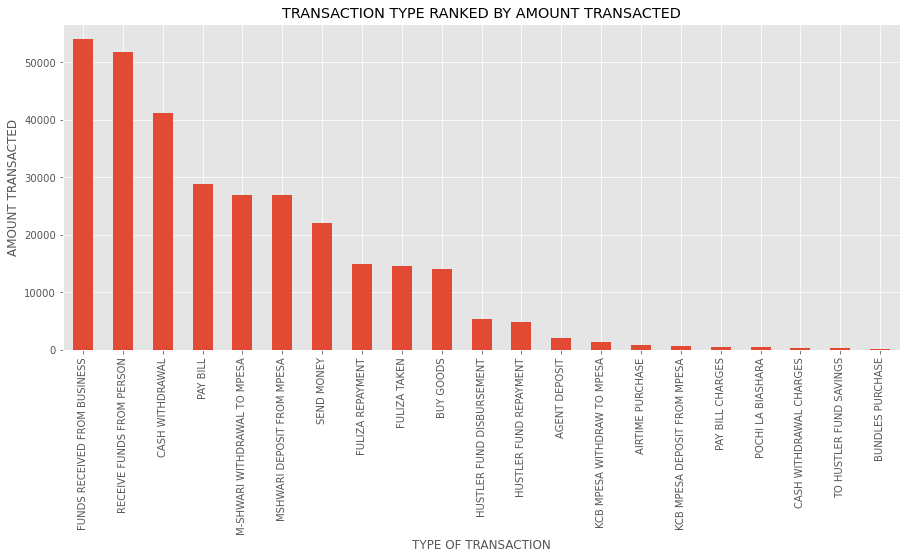

In [7]:
transaction_type = df.groupby('transaction_type').sum()['transaction_amount'].sort_values(ascending = False)

plt.style.use('ggplot')
chart = transaction_type.plot(kind = 'bar', figsize = (15, 6));
chart.set_title("TRANSACTION TYPE RANKED BY AMOUNT TRANSACTED");
chart.set_xlabel("TYPE OF TRANSACTION");
chart.set_ylabel("AMOUNT TRANSACTED");
plt.savefig("charts/TRANSACTION TYPE RANKED BY AMOUNT TRANSACTED.png", bbox_inches='tight')

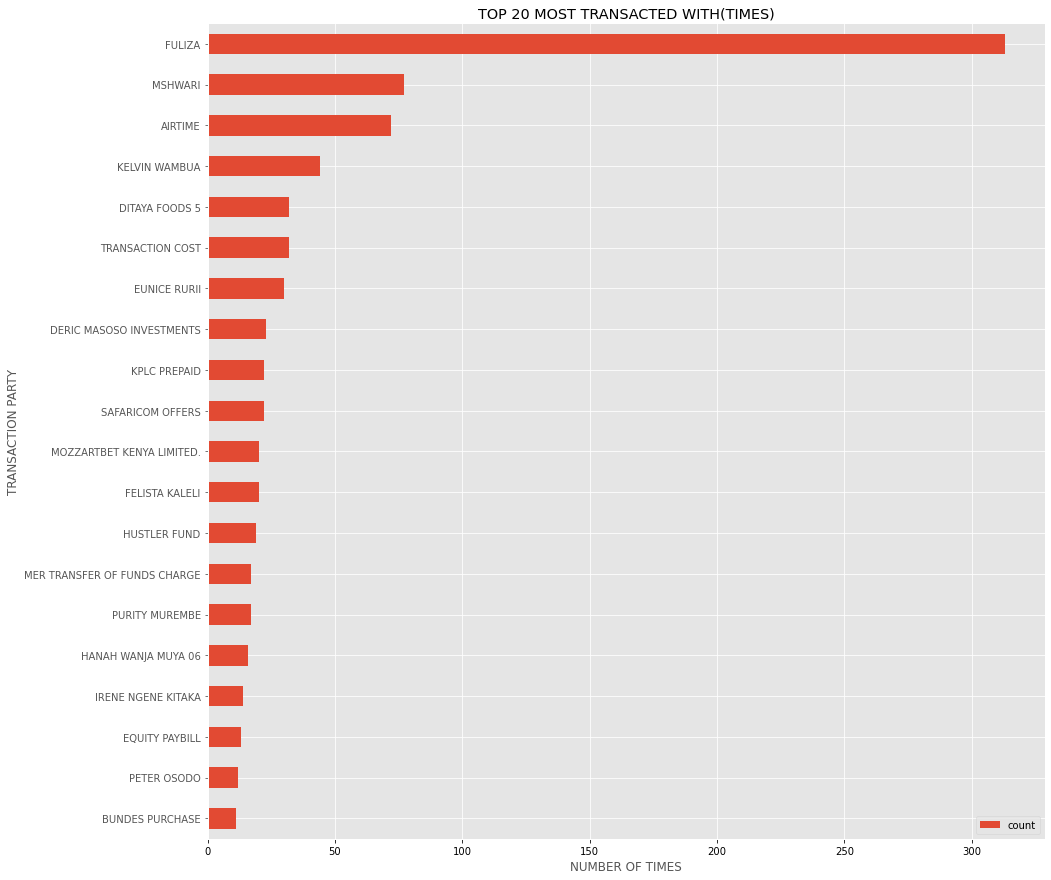

In [8]:
transaction_with = df.groupby('transaction_party').agg(count = ('balance', 'count')).sort_values(by = 'count', ascending = False)[:20]
transaction_with = transaction_with.iloc[::-1]


plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'barh', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("TOP 20 MOST TRANSACTED WITH(TIMES)");
chart.set_ylabel("TRANSACTION PARTY");
chart.set_xlabel("NUMBER OF TIMES");
plt.savefig("charts/PARTY YOU HAVE TRANSACTED WITH MOST(TIMES).png", bbox_inches='tight')

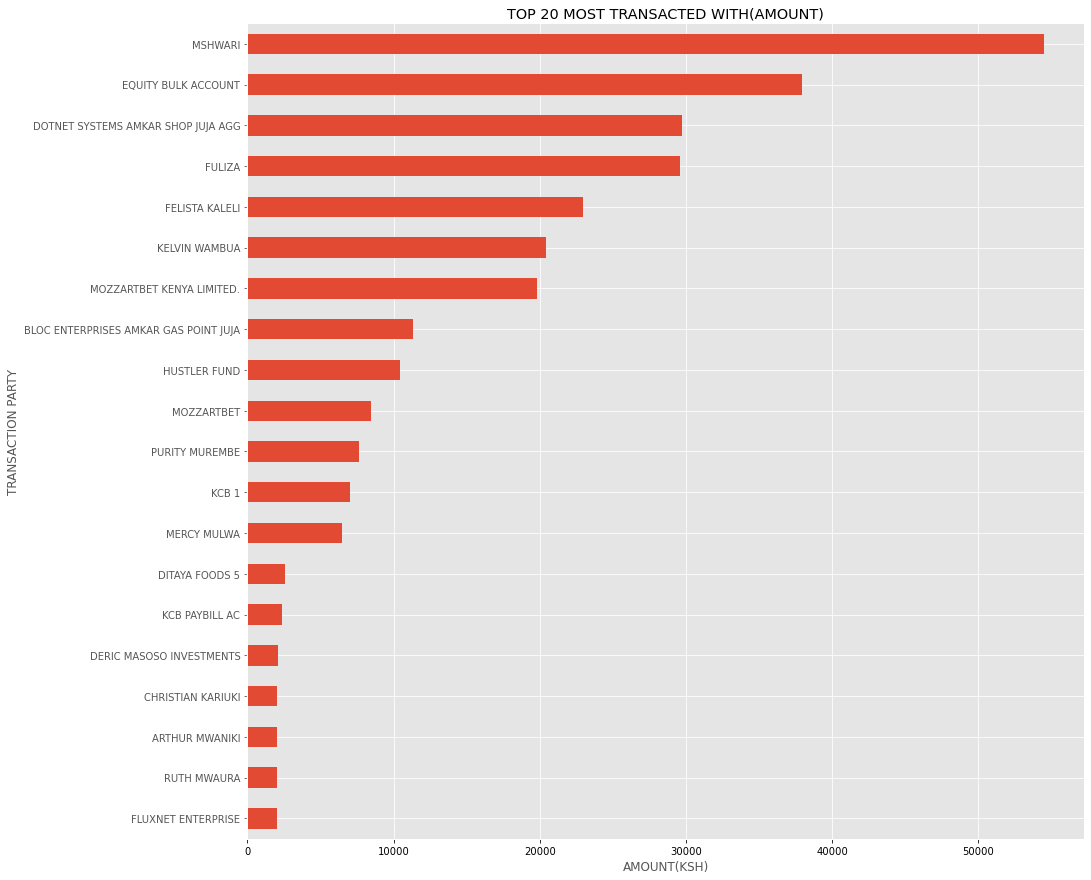

In [9]:
transaction_with = df.groupby('transaction_party').sum()['transaction_amount'].sort_values(ascending = True)[-20:]
plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'barh', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("TOP 20 MOST TRANSACTED WITH(AMOUNT)");
chart.set_ylabel("TRANSACTION PARTY");
chart.set_xlabel("AMOUNT(KSH)");
plt.savefig("charts/PARTY YOU HAVE TRANSACTED WITH MOST(AMOUNT).png", bbox_inches='tight')

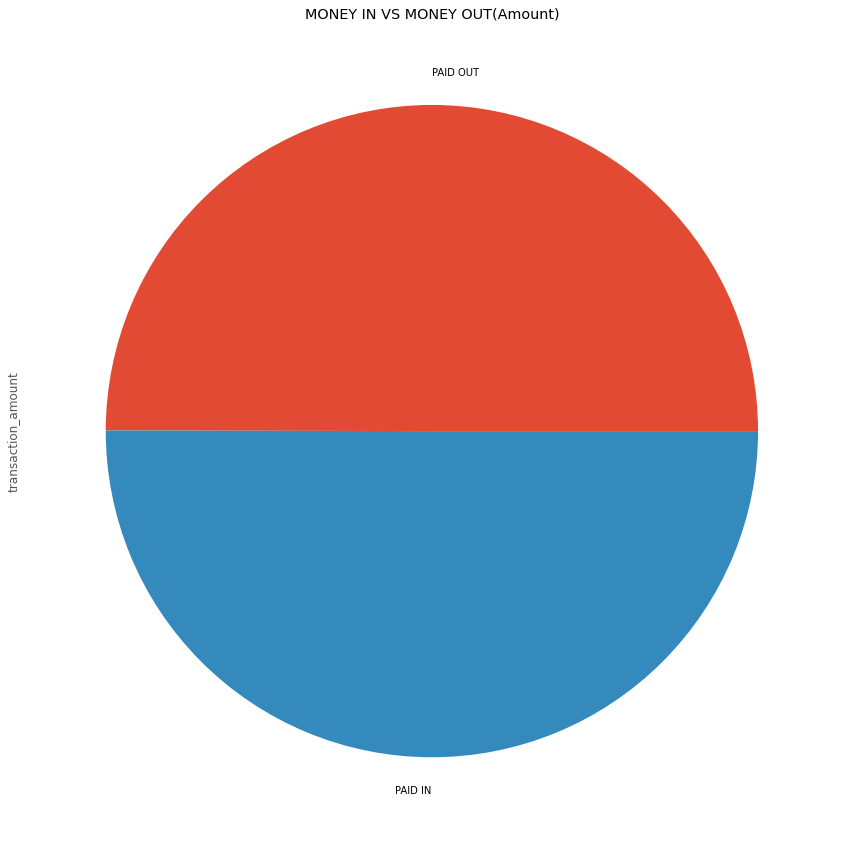

In [10]:
transaction_with = df.groupby('paid_in_or_withdrawn').sum()['transaction_amount'].sort_values(ascending = True)[-20:]
transaction_with.rename(index = {'WITHDRAWN': 'PAID OUT'}, inplace = True)

chart = transaction_with.plot(kind = 'pie', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("MONEY IN VS MONEY OUT(Amount)");
plt.savefig("MONEY IN VS MONEY OUT(Amount).png", bbox_inches='tight')

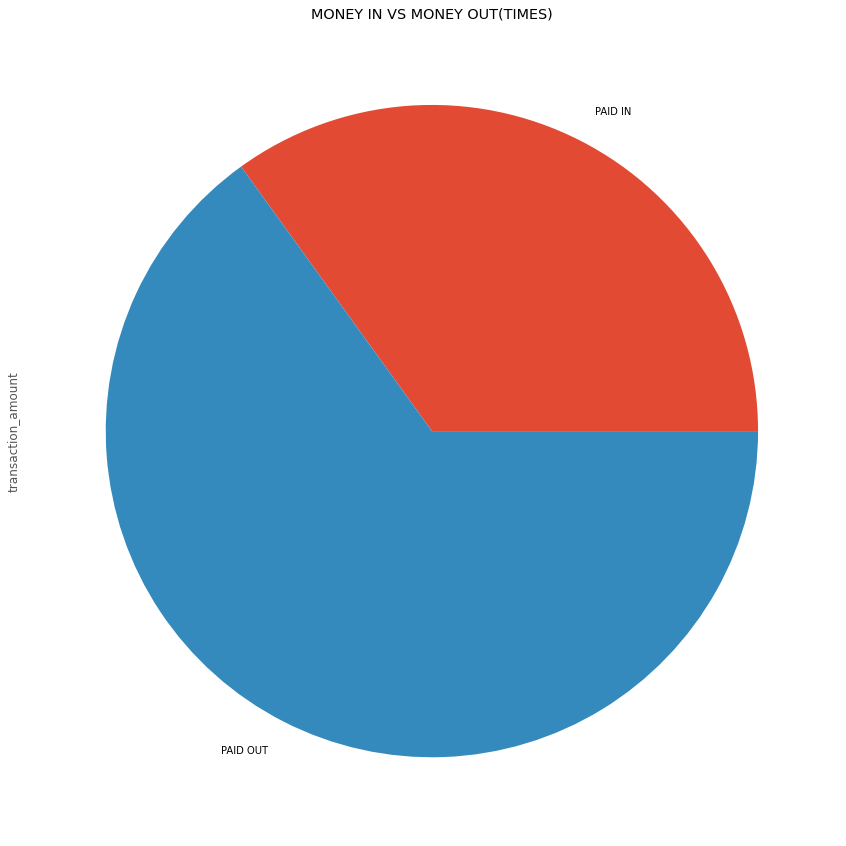

In [11]:
transaction_with = df.groupby('paid_in_or_withdrawn').count()['transaction_amount'].sort_values(ascending = True)[-20:]
transaction_with.rename(index = {'WITHDRAWN': 'PAID OUT'}, inplace = True)

chart = transaction_with.plot(kind = 'pie', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("MONEY IN VS MONEY OUT(TIMES)");
plt.savefig("MONEY IN VS MONEY OUT(Amount).png", bbox_inches='tight')

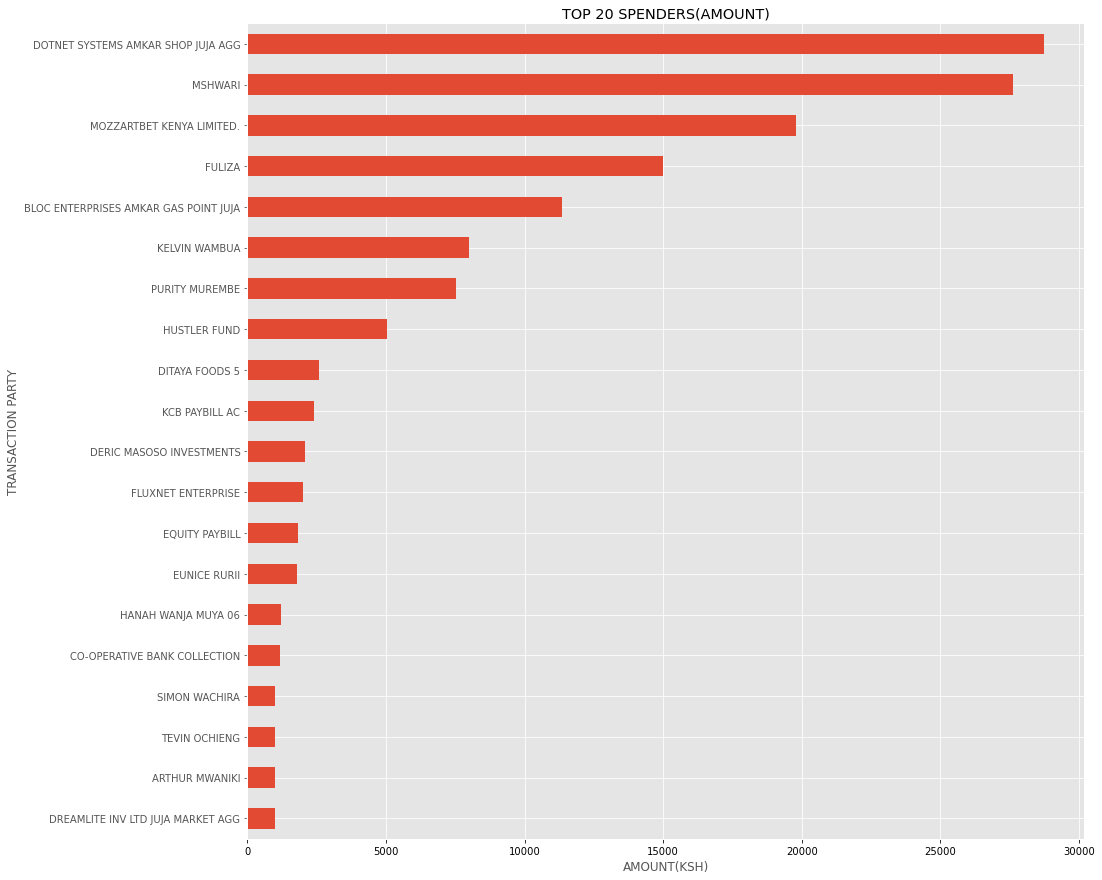

In [12]:
out_df = df[df.paid_in_or_withdrawn == 'WITHDRAWN']

transaction_with = out_df.groupby('transaction_party').sum()['transaction_amount'].sort_values(ascending = True)[-20:]
plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'barh', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("TOP 20 SPENDERS(AMOUNT)");
chart.set_ylabel("TRANSACTION PARTY");
chart.set_xlabel("AMOUNT(KSH)");
plt.savefig("charts/TOP 20 SPENDERS(AMOUNT).png", bbox_inches='tight')

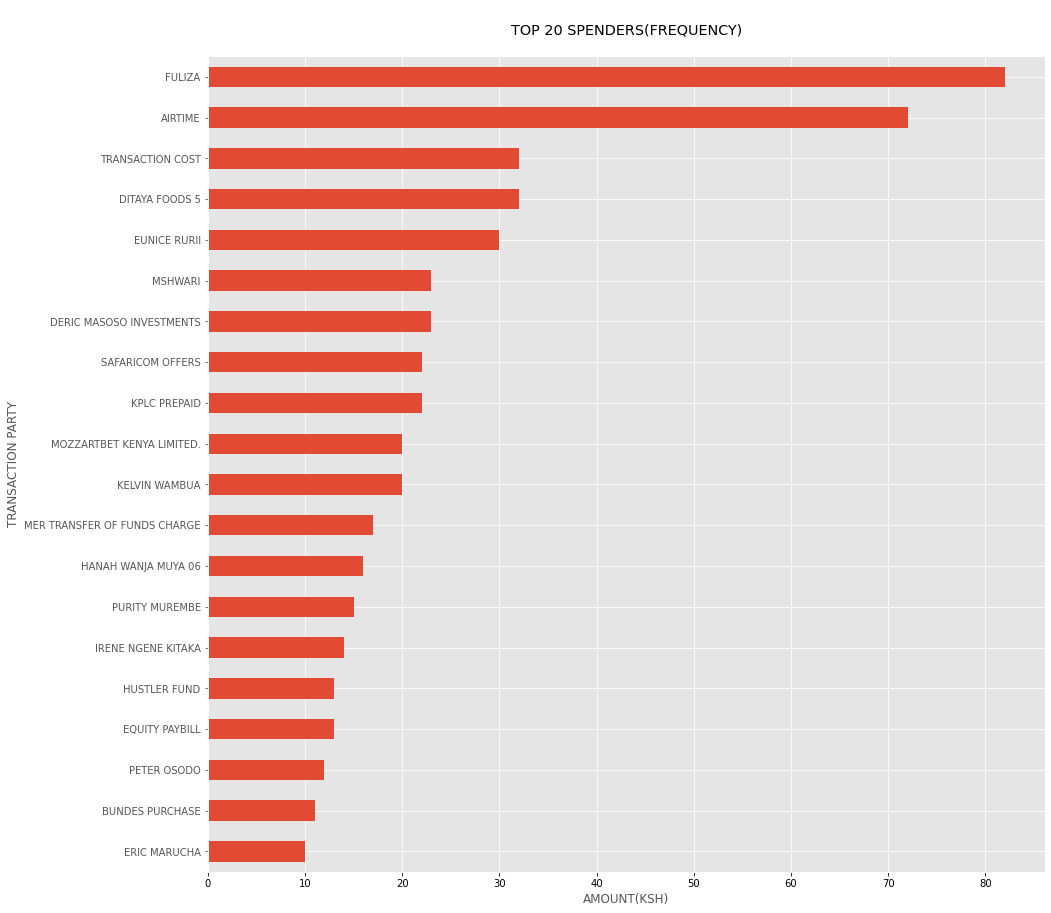

In [13]:
transaction_with = out_df.groupby('transaction_party').count()['transaction_amount'].sort_values(ascending = True)[-20:]
plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'barh', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("\nTOP 20 SPENDERS(FREQUENCY)\n");
chart.set_ylabel("TRANSACTION PARTY");
chart.set_xlabel("AMOUNT(KSH)");
plt.savefig("charts/TOP 20 SPENDERS(FREQUENCY).png", bbox_inches='tight')

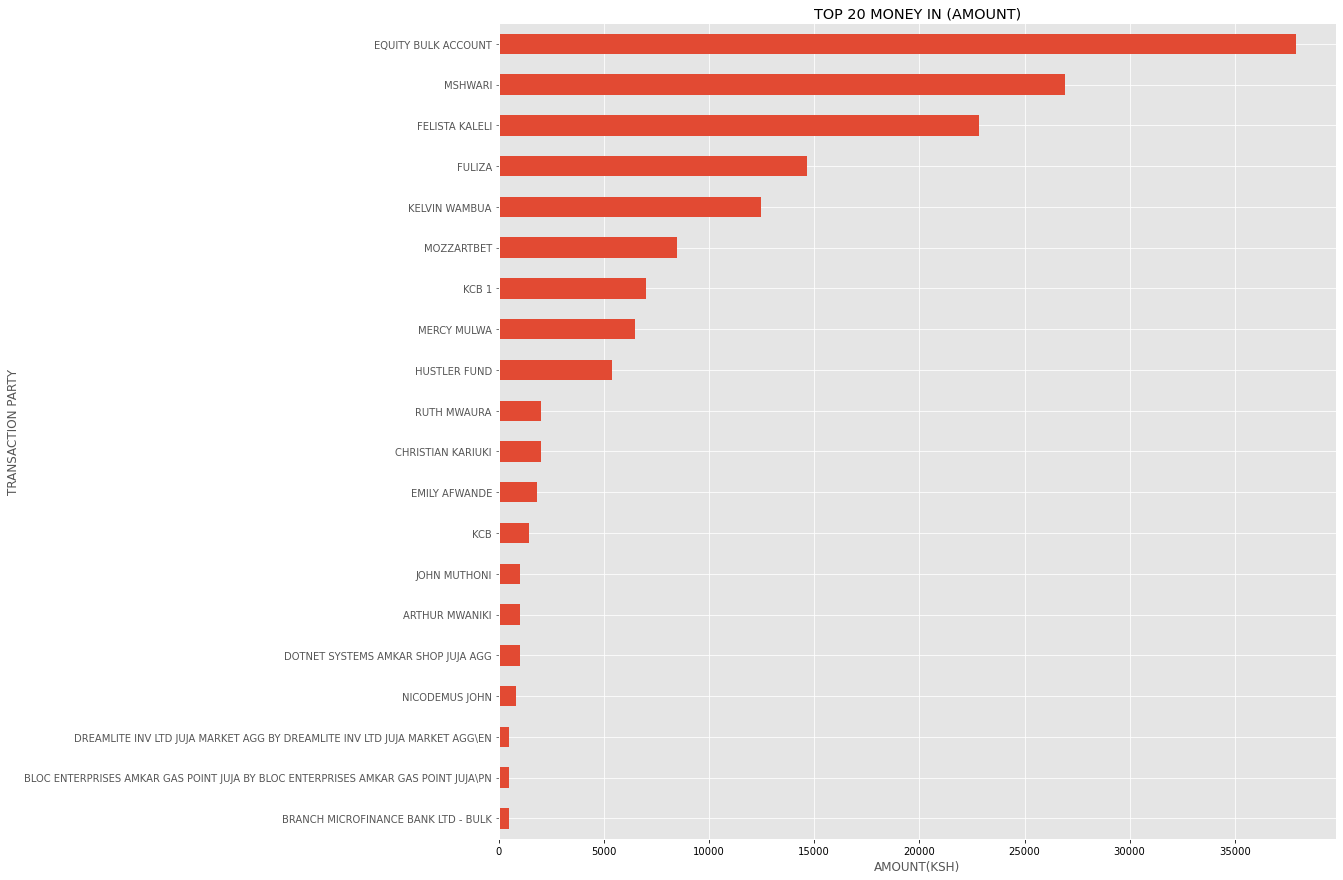

In [14]:
in_df = df[df.paid_in_or_withdrawn == 'PAID IN']
in_df

transaction_with = in_df.groupby('transaction_party').sum()['transaction_amount'].sort_values(ascending = True)[-20:]
plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'barh', figsize = (15, 15));
# chart.set_facecolor('black')
chart.tick_params(axis='x', colors='black')


chart.set_title("TOP 20 MONEY IN (AMOUNT)");
chart.set_ylabel("TRANSACTION PARTY");
chart.set_xlabel("AMOUNT(KSH)");
plt.savefig("charts/TOP 20 MONEY IN (AMOUNT).png", bbox_inches='tight')

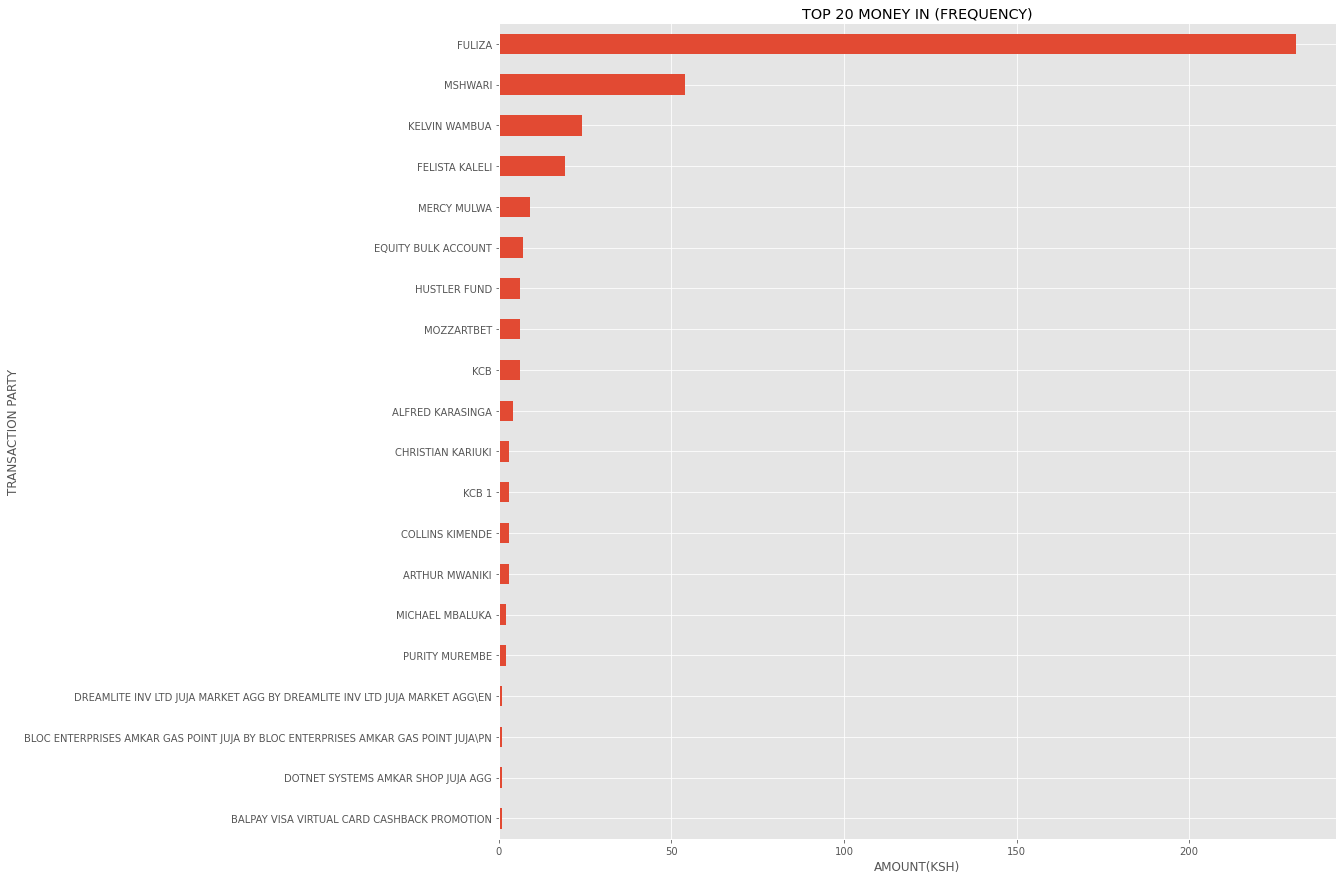

In [15]:
in_df = df[df.paid_in_or_withdrawn == 'PAID IN']
in_df

transaction_with = in_df.groupby('transaction_party').count()['transaction_amount'].sort_values(ascending = True)[-20:]
plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'barh', figsize = (15, 15));
# chart.set_facecolor('black')

chart.set_title("TOP 20 MONEY IN (FREQUENCY)");
chart.set_ylabel("TRANSACTION PARTY");
chart.set_xlabel("AMOUNT(KSH)");
plt.savefig("charts/TOP 20 MONEY IN (FREQUENCY).png", bbox_inches='tight')

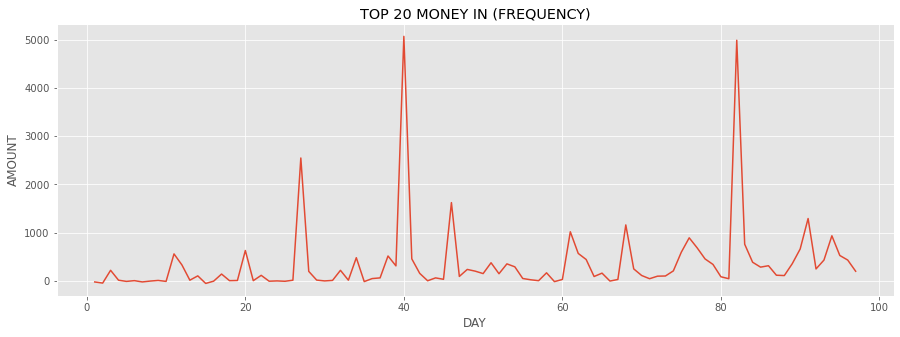

In [16]:
transaction_with = df.groupby('trasaction_day').mean()['balance']

plt.style.use('ggplot')

chart = transaction_with.plot(kind = 'line', figsize = (15, 5));
# chart.set_facecolor('black')

chart.set_title("TOP 20 MONEY IN (FREQUENCY)");
chart.set_ylabel("AMOUNT");
chart.set_xlabel("DAY");
plt.savefig("charts/AVERAGE DAILY BALANCE.png", bbox_inches='tight')

<AxesSubplot:xlabel='trasaction_day', ylabel='transaction_amount'>

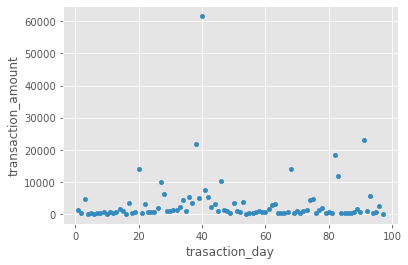

In [17]:
data = pd.DataFrame(df.groupby('trasaction_day').sum()['transaction_amount'])
data.reset_index(inplace = True)

data.plot(kind = 'scatter', x = 'trasaction_day', y = 'transaction_amount')

In [23]:
v = df.groupby('transaction_type').sum()['transaction_amount'].sort_values(ascending = False)
y_axis = list(v.values)
x_axis = list(v.index)
y_axis

[53975.0,
 52178.85,
 41101.0,
 28868.0,
 26908.0,
 26907.0,
 22115.0,
 15588.01,
 15445.16,
 14644.0,
 5400.0,
 4768.0,
 2350.0,
 1450.0,
 853.0,
 705.0,
 541.0,
 480.0,
 387.0,
 270.0,
 245.0,
 230.0]

In [31]:
data = df.groupby('trasaction_day').mean()['balance']
x = list(data.index)
y = list(data.values)


[-26.636363636363637,
 -50.0,
 215.51529411764707,
 9.925,
 -15.166666666666666,
 0.5,
 -26.25,
 -8.333333333333334,
 5.0,
 -15.0,
 556.0,
 326.6666666666667,
 10.0,
 99.70833333333333,
 -57.642857142857146,
 -10.0,
 137.59555555555553,
 0.625,
 4.166666666666667,
 626.76375,
 0.125,
 110.78304347826088,
 -10.875,
 -5.083333333333333,
 -12.375,
 9.68421052631579,
 2549.1839999999997,
 193.1585,
 12.0,
 -5.0,
 5.5,
 215.0,
 10.147200000000002,
 477.36470588235295,
 -18.984,
 43.467999999999996,
 57.88666666666666,
 513.1591891891892,
 307.4378571428571,
 5076.838636363636,
 453.48125,
 151.87448275862067,
 -1.7894736842105263,
 57.83789473684211,
 28.333333333333332,
 1622.2855555555554,
 88.52636363636363,
 233.75,
 197.8166666666667,
 147.30625,
 372.26818181818186,
 144.39375,
 349.1328571428571,
 287.77,
 45.18,
 18.75,
 -0.23555555555555527,
 163.23272727272726,
 -19.590666666666667,
 25.0,
 1016.3499999999999,
 565.6927272727272,
 439.97,
 86.47,
 156.47,
 -7.812,
 24.923333333333

In [33]:
data = df.groupby('trasaction_day').mean()
data

,year,month,date,weekday,hour,minute,second,transaction_amount,balance
trasaction_day,,,,,,,,,
1,2023.0,1.0,1.0,6.0,11.272727,6.909091,33.181818,112.909091,-26.636364
2,2023.0,1.0,2.0,0.0,0.000000,27.000000,21.000000,100.000000,-50.000000
3,2023.0,1.0,4.0,2.0,16.764706,26.352941,36.941176,269.101176,215.515294
4,2023.0,1.0,5.0,3.0,13.000000,1.000000,21.500000,19.850000,9.925000
5,2023.0,1.0,6.0,4.0,14.333333,34.000000,23.666667,30.333333,-15.166667
...,...,...,...,...,...,...,...,...,...
97,2023.0,4.0,11.0,1.0,10.000000,32.166667,33.166667,36.666667,112.316667
98,2023.0,4.0,12.0,2.0,17.600000,21.600000,26.700000,41.467500,-14.717500
99,2023.0,4.0,13.0,3.0,9.000000,41.750000,29.875000,125.000000,25.000000


In [46]:
data = df[df.paid_in_or_withdrawn == 'WITHDRAWN'].groupby('transaction_party').sum().transaction_amount.sort_values(ascending = False).head(10)
x = list(data.index)
y = list(data.values)

transaction_party
DOTNET SYSTEMS AMKAR SHOP JUJA AGG       28751.00
MSHWARI                                  27612.00
MOZZARTBET KENYA LIMITED.                19790.00
FULIZA                                   15588.01
BLOC ENTERPRISES AMKAR GAS POINT JUJA    11350.00
KELVIN WAMBUA                             8134.00
PURITY MUREMBE                            7511.00
HUSTLER FUND                              5038.00
DITAYA FOODS 5                            2790.00
KCB PAYBILL AC                            2440.00
Name: transaction_amount, dtype: float64

In [58]:
df.groupby('transaction_type').sum()['transaction_amount'].sort_values(ascending=False).head(10)

transaction_type
FUNDS RECEIVED FROM BUSINESS    53975.00
RECEIVE FUNDS FROM PERSON       52178.85
CASH WITHDRAWAL                 41101.00
PAY BILL                        28868.00
M-SHWARI WITHDRAWAL TO MPESA    26908.00
MSHWARI DEPOSIT FROM MPESA      26907.00
SEND MONEY                      22115.00
FULIZA REPAYMENT                15588.01
FULIZA TAKEN                    15445.16
BUY GOODS                       14644.00
Name: transaction_amount, dtype: float64

In [59]:
df

,trasaction_day,year,month,date,weekday,hour,minute,second,transaction_type,transaction_party,transaction_amount,paid_in_or_withdrawn,balance
receipt,,,,,,,,,,,,,
RDF1862UBT,101,2023,4,15,5,12,33,27,FULIZA TAKEN,FULIZA,20.0,PAID IN,0.0
RDF1862UBT,101,2023,4,15,5,12,33,27,PAY BILL,KPLC PREPAID,20.0,WITHDRAWN,-20.0
RDE66UNC64,100,2023,4,14,4,20,14,15,FULIZA TAKEN,FULIZA,20.0,PAID IN,0.0
RDE66UNC64,100,2023,4,14,4,20,14,15,SEND MONEY,PETER OSODO,20.0,WITHDRAWN,-20.0
RDE06U0Y46,100,2023,4,14,4,20,9,28,FULIZA TAKEN,FULIZA,40.0,PAID IN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RA10GI49RQ,1,2023,1,1,6,10,2,33,PAY BILL CHARGES,TRANSACTION COST,4.0,WITHDRAWN,0.0
RA10GI49RQ,1,2023,1,1,6,10,2,33,FULIZA TAKEN,FULIZA,454.0,PAID IN,4.0
RA10GI49RQ,1,2023,1,1,6,10,2,33,PAY BILL,EQUITY PAYBILL,450.0,WITHDRAWN,-450.0


In [63]:
data = df.groupby('transaction_party').sum()['transaction_amount'].sort_values(ascending = False)
data

transaction_party
MSHWARI                               54520.00
EQUITY BULK ACCOUNT                   37918.00
FULIZA                                31033.17
DOTNET SYSTEMS AMKAR SHOP JUJA AGG    29951.00
FELISTA KALELI                        23141.00
                                        ...   
ESAU KURUSWO                             10.00
PIUS KAMAU                               10.00
JUSTINA CLAUDIA NZILANI KISAVI            5.00
JULIUS MURIMI                             5.00
PIUS WACHANIA                             5.00
Name: transaction_amount, Length: 172, dtype: float64

In [70]:
data = df.groupby('paid_in_or_withdrawn').count()['transaction_amount']
data

paid_in_or_withdrawn
PAID IN      420
WITHDRAWN    766
Name: transaction_amount, dtype: int64

In [74]:
data = df[df.paid_in_or_withdrawn == 'WITHDRAWN'].groupby(
                        'transaction_party').sum().transaction_amount.sort_values(ascending=False).tail(10)
data

transaction_party
RISPA AMASWACHE                   10.0
REGINA KIARIE                     10.0
PRISCA NYANG'AU                   10.0
ESAU KURUSWO                      10.0
PAULINE NDUNGE                    10.0
CATHELINE MUTHONI KIGWA           10.0
PIUS KAMAU                        10.0
JUSTINA CLAUDIA NZILANI KISAVI     5.0
PIUS WACHANIA                      5.0
JULIUS MURIMI                      5.0
Name: transaction_amount, dtype: float64

In [76]:
data = df[df.paid_in_or_withdrawn == 'PAID IN'].groupby(
                        'transaction_party').sum().transaction_amount.sort_values(ascending=False).tail(10)
data

transaction_party
COLLINS KIMENDE                                                                    235.00
MICHAEL MBALUKA                                                                    200.00
LILLIAN ACHIENG                                                                    150.00
KOREY COMM ROYAL SHOP COMM MERU TOWN BY KOREY COMM ROYAL SHOP COMM MERU TOWN\PK    150.00
PETER KIANIA                                                                       150.00
PURITY MUREMBE                                                                     110.00
MALI.                                                                              100.00
IAN KYALO                                                                          100.00
SAMUEL MUSYOKI                                                                      88.00
BALPAY VISA VIRTUAL CARD CASHBACK PROMOTION                                         19.85
Name: transaction_amount, dtype: float64